# Support Vector Machine using sklearn

Given a dataset which contains a excerpts of text written by some author and the
corresponding author tag, implement an SVM classifier to predict the author tag
of the test text excerpts.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

In [2]:
#import dataset
datas=pd.read_csv('Train(1).csv',header=None)
datas.head()

,0,1,2
0,NaN,text,author
1,0.0,The sight of the military restored hope to tho...,MWS
2,1.0,Just as the building was wiped out by a German...,HPL
3,2.0,Do you wonder how it will seem?,HPL
4,3.0,"My revenge is of no moment to you; yet, while ...",MWS


In [3]:
#Drop the first coloumn
dataset=datas.drop(0,axis=1)

In [4]:
#Print first rows of dataset
dataset.head()

,1,2
0,text,author
1,The sight of the military restored hope to tho...,MWS
2,Just as the building was wiped out by a German...,HPL
3,Do you wonder how it will seem?,HPL
4,"My revenge is of no moment to you; yet, while ...",MWS


In [5]:
#Start reading from 1st row
X=dataset.iloc[1:,0]
print(X.head())
print(X.shape)

1    The sight of the military restored hope to tho...
2    Just as the building was wiped out by a German...
3                      Do you wonder how it will seem?
4    My revenge is of no moment to you; yet, while ...
5    If he dares to reply, you can tell him from Lu...
Name: 1, dtype: object
(15663,)


In [6]:
Y=dataset.iloc[1:,1]
print(Y.head())
print(Y.shape)

1    MWS
2    HPL
3    HPL
4    MWS
5    EAP
Name: 2, dtype: object
(15663,)


In [7]:
X_data=X.to_numpy()
X_data.shape

(15663,)

In [8]:
Y_label=Y.to_numpy()
Y_label.shape

(15663,)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
#Vectorizer from sklearn
# GitHub link for source code of CountVectorizer 'https://github.com/scikit-learn/scikit-learn/blob/b194674c4/sklearn/feature_extraction/text.py#L828'

vectorizer = CountVectorizer()
X1= vectorizer.fit_transform(X_data)

In [11]:
#Function used for splitting the data
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y_label, test_size=0.3,random_state=109)

In [13]:
X_train.shape

(10964, 23058)

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible.
In addition to performing linear classification, SVMs can efficiently perform a non-linear classification, implicitly mapping their inputs into high-dimensional feature spaces.

In [31]:
#SVM using sklearn

from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',C=1) # Linear Kernel
#Train the model using the training sets
clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [32]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7671845073419876


The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall)

When true positive + false positive == 0, precision is undefined; When true positive + false negative == 0, recall is undefined. In such cases, by default the metric will be set to 0, as will f-score, and UndefinedMetricWarning will be raised. This behavior can be modified with zero_division.

In [33]:
from sklearn.metrics import f1_score

In [34]:
print("The F1 score with different average methods are   :")
print(f1_score(y_test, y_pred, average='macro') )
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))


The F1 score with different average methods are   :
0.7663888548760031
0.7671845073419876
0.7669194190344775


In [35]:
from sklearn.metrics import confusion_matrix 

The Confusion Matrix


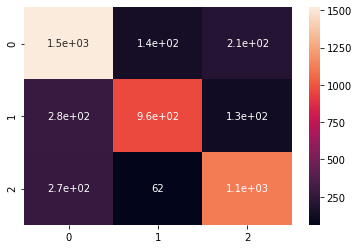

In [36]:
print('The Confusion Matrix')
import seaborn as sns
import matplotlib.pyplot as plt     
cm=confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 

In [37]:
from sklearn.metrics import classification_report as cr
print(cr(y_test ,y_pred))

              precision    recall  f1-score   support

         EAP       0.73      0.81      0.77      1871
         HPL       0.82      0.70      0.76      1372
         MWS       0.77      0.77      0.77      1456

    accuracy                           0.77      4699
   macro avg       0.78      0.76      0.77      4699
weighted avg       0.77      0.77      0.77      4699



# Using Non-linear Kernels

In [38]:
#Create a svm Classifier
clf1=svm.SVC(kernel='poly') # Linear Kernel
#Train the model using the training sets
clf1.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf1.predict(X_test)
print("Accuracy using poly kernels:",metrics.accuracy_score(y_test, y_pred))

/home/ashish/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy using poly kernels: 0.3981698233666738


The Confusion Matrix


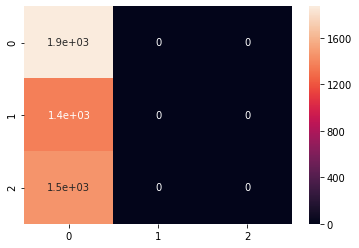

In [39]:
print('The Confusion Matrix')
import seaborn as sns
import matplotlib.pyplot as plt     
cm=confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 

In [40]:
#Create a svm Classifier
clf1=svm.SVC(kernel='rbf') # Linear Kernel
#Train the model using the training sets
clf1.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf1.predict(X_test)
print("Accuracy using poly kernels:",metrics.accuracy_score(y_test, y_pred))

/home/ashish/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy using poly kernels: 0.398382634603107


The Confusion Matrix


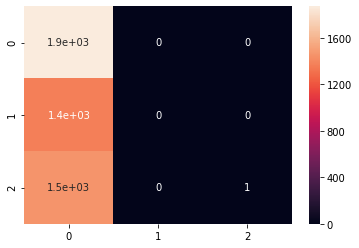

In [41]:
print('The Confusion Matrix')
import seaborn as sns
import matplotlib.pyplot as plt     
cm=confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 